## [作業重點]
目前你應該已經要很清楚資料集中，資料的型態是什麼樣子囉！包含特徵 (features) 與標籤 (labels)。因此要記得未來不管什麼專案，必須要把資料清理成相同的格式，才能送進模型訓練。
今天的作業開始踏入決策樹這個非常重要的模型，請務必確保你理解模型中每個超參數的意思，並試著調整看看，對最終預測結果的影響為何

## 作業

1. 試著調整 DecisionTreeClassifier(...) 中的參數，並觀察是否會改變結果？
2. 改用其他資料集 (boston, wine)，並與回歸模型的結果進行比較

In [1]:
from sklearn import datasets, metrics

# 如果是分類問題，請使用 DecisionTreeClassifier，若為回歸問題，請使用 DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import train_test_split

In [3]:
breast_cancer = datasets.load_breast_cancer()
x_train, x_test, y_train, y_test = train_test_split(breast_cancer.data, breast_cancer.target, test_size=0.2, random_state=4)

In [4]:
clf = DecisionTreeClassifier(max_leaf_nodes=12)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
acc = metrics.accuracy_score(y_test, y_pred)
print("Acuuracy: ", acc)

Acuuracy:  0.9035087719298246


In [5]:
print(breast_cancer.feature_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [6]:
print("Feature importance: ", clf.feature_importances_)

Feature importance:  [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.00906388 0.
 0.01867878 0.         0.         0.02356608 0.77828274 0.06151726
 0.05479038 0.         0.         0.05410088 0.         0.        ]


In [18]:
import pandas as pd
import numpy as np

clf.feature_importances_.tolist()
df = pd.DataFrame({'feature':breast_cancer.feature_names,'feature_importance':clf.feature_importances_.tolist()})
df = df.sort_values(by=['feature_importance'],ascending=False).reset_index(drop=True)
df[:10]

,feature,feature_importance
0,worst perimeter,0.778283
1,worst area,0.061517
2,worst smoothness,0.054790
3,worst concave points,0.054101
4,worst texture,0.023566
5,symmetry error,0.018679
6,concavity error,0.009064
7,mean radius,0.000000
8,mean texture,0.000000
9,worst symmetry,0.000000


In [26]:
def autolabel(rects):
    # attach some text labels
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x()+rect.get_width()/2., 1.02*height, '%f'%float(height),
                ha='center', va='bottom')

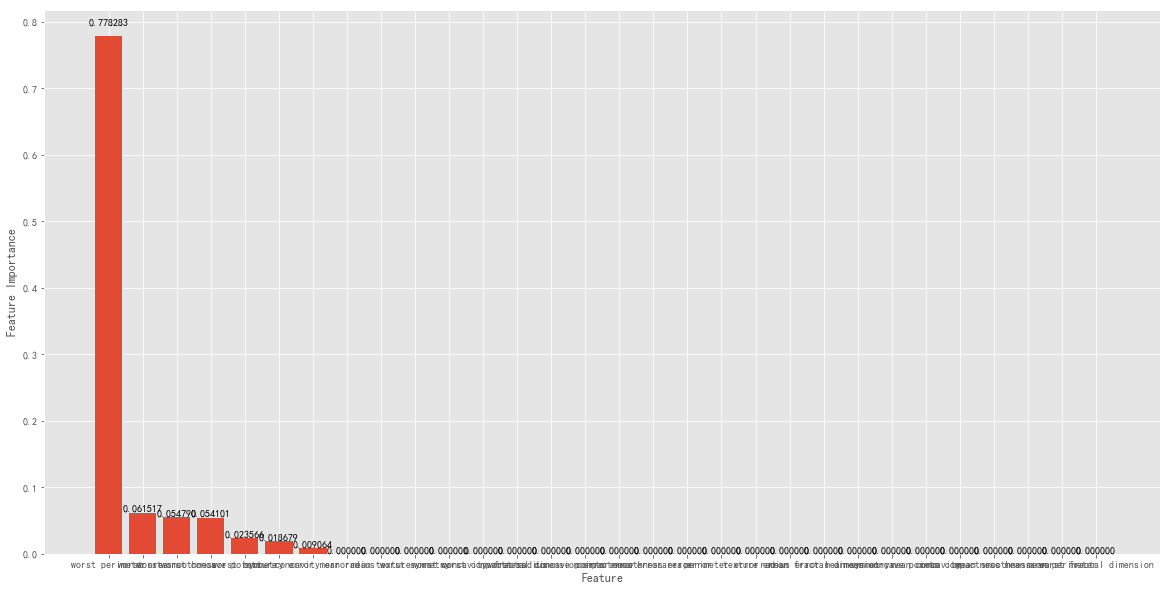

In [28]:
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')

fig = plt.figure(figsize=(20,10))


#中文字體 font = matplotlib.font_manager.FontProperties(fname='wt011.ttf')
plt.rcParams['font.family']='SimHei'

gini = plt.bar(df.index,df['feature_importance'],align='center')
plt.xlabel('Feature') #X軸名稱
plt.ylabel('Feature Importance') #Y軸名稱
plt.xticks(df.index, df['feature']) #X軸項目名稱

autolabel(gini)
#for i in range(len(df.index)):
#    plt.annotate(round(df['gini_importance'][i],3),xy=(df.index[i],df['gini_importance'][i]),
#             xytext=(df.index[i],df['gini_importance'][i]))

plt.show()